<a href="https://colab.research.google.com/github/muhammedafsalpm/ICT-Academy-of-Kerala/blob/main/Assignment_Case_Study_on_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [33]:
data.shape

(112, 2)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [35]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


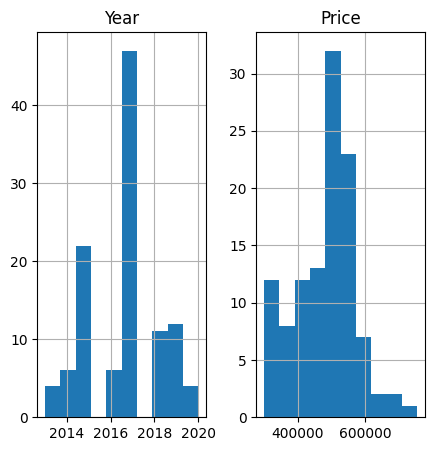

In [36]:
freqgraph = data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(5,5))
plt.show()

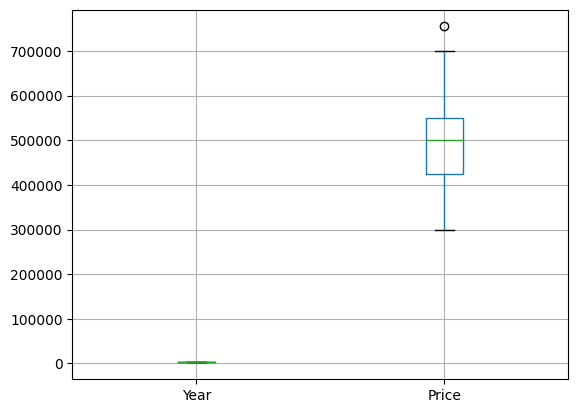

In [37]:
data.boxplot()
plt.show()

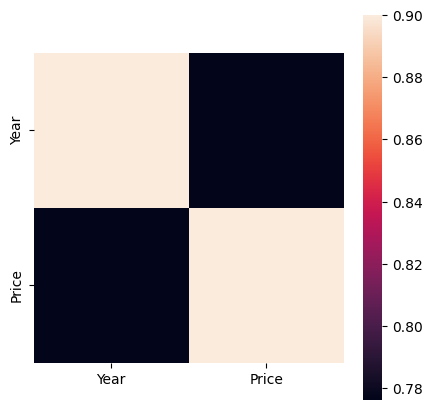

In [38]:
corrmat = data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()


In [39]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [40]:
# Splitting data into features (X) and target (y)
X = data[['Year']]
y = data['Price']

# Creating the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_pred = linear_model.predict(X)

# Creating the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # The alpha value can be tuned
lasso_model.fit(X, y)
lasso_pred = lasso_model.predict(X)

# Calculating performance metrics
linear_mse = mean_squared_error(y, linear_pred)
lasso_mse = mean_squared_error(y, lasso_pred)

# Predicting the price of a 2022 model using DataFrame for prediction
year_2022 = pd.DataFrame({'Year': [2022]})
linear_2022_pred = linear_model.predict(year_2022)
lasso_2022_pred = lasso_model.predict(year_2022)

linear_mse, lasso_mse, linear_2022_pred[0], lasso_2022_pred[0]

(3276721166.5638003, 3276721166.5675607, 715488.0785097629, 715487.8759836257)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [43]:
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [44]:
print("MSE is ",mean_squared_error(y_test, predictions))

MSE is  4326906256.829671
